# Визуализация.

Датасет представляет собой коллекцию медицинских и демографических данных пациентов, а также их статус диабета (положительный или отрицательный). Данные включают такие характеристики, как возраст, пол, индекс массы тела (ИМТ), гипертония, сердечно-сосудистые заболевания, история курения, уровень HbA1c и уровень глюкозы в крови. 

В будущем этот датасет может быть использован для построения моделей машинного обучения для прогнозирования диабета у пациентов на основе их истории болезни и демографической информации. Это может быть полезно для медицинских работников при выявлении пациентов, которые могут быть подвержены риску развития диабета, и при разработке персонализированных планов лечения.

Описание столбцов:

|Название| Описание |
|--|--|
|`gender`| Пол пациента |
|`age`| Возраст |
|`hypertension`| Гипертония —  это состояние, при котором кровяное давление в артериях постоянно повышено. Он принимает значения 0 или 1, где 0 означает отсутствие гипертонии, а 1 —  наличие гипертонии. |
|`heart_disease`| Болезни сердца —  это еще одно состояние, которое связано с повышенным риском развития диабета. Он также принимает значения 0 или 1, где 0 означает отсутствие сердечных заболеваний, а 1 —  наличие сердечных заболеваний. |
|`smoking_history`| Опыт курения —  также считается фактором риска развития диабета и может усугубить осложнения, связанные с диабетом. | 
|`bmi`| Это показатель количества жира в организме, основанный на весе и росте. Более высокие значения ИМТ связаны с повышенным риском развития диабета. Диапазон ИМТ в наборе данных составляет от 10,16 до 71,55. ИМТ менее 18,5 —  это недостаточный вес, 18,5-24,9 —  нормальный, 25-29,9 —  избыточный вес, а 30 и более —  ожирение. |
|`HbA1c_level`| Уровень HbA1c (гемоглобин A1c) —  это показатель среднего уровня сахара в крови человека за последние 2-3 месяца. Более высокий уровень указывает на больший риск развития диабета. В основном более 6,5% уровня HbA1c указывает на диабет. | 
|`blood_glucose_level`| Уровень глюкозы в крови —  это количество глюкозы в крови в определенный момент времени. Высокий уровень глюкозы в крови является основным признаком диабета. |
|`diabetes`| Диабет является целевой переменной (таргетом), при этом значение 1 указывает на наличие диабета, а 0 —  на его отсутствие. |

## Задание

Проведите визуализацию данных и попробуйте выяснить причины, от чего и с чем связаны основные причины наличия диабета у людей.

Ваша цель —  визуально с помощью графиков определить и доказать, что при наличии какого-либо фактора возможен риск развития диабета.

Этапы выполнения задания (наш pipeline):

1. Загрузка и предобработка данных (при необходимости)
2. Описательный анализ данных, просмотр данных
3. Построение гистограмм числовых переменных
4. Построение диаграмм размаха для определения наличия выбросов (ящики с усами) числовых переменных
5. Построение столбчатых диаграмм для категориальных переменных
6. Построение матрицы корреляции признаков (Phik или Пирсона)
7. Сравнение двух выборок
8. Общий вывод

## Загрузка данных

In [23]:
### импортируйте нужные библиотеки 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import phik
import seaborn as sns

from phik.report import plot_correlation_matrix
from phik import report
from scipy import stats

In [24]:
df = pd.read_csv('./diabetes_prediction_dataset.csv')
df.sample(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
837,Female,44.00,0,0,never,27.32,6.2,158,0
89721,Female,8.00,0,0,No Info,27.32,3.5,126,0
35668,Male,7.00,0,0,never,14.90,4.0,140,0
47203,Female,28.00,0,0,never,21.88,6.1,155,0
2266,Female,47.00,0,0,current,37.42,6.1,85,0
69754,Female,35.00,0,0,current,30.90,6.2,80,0
98397,Male,21.00,0,0,No Info,27.32,3.5,80,0
2751,Male,25.00,0,0,No Info,27.32,4.5,155,0
75782,Female,0.56,0,0,No Info,13.07,6.0,100,0
73906,Female,15.00,0,0,never,27.32,6.5,145,0


Рассмотрим данные на предмет их типа:

In [25]:
# ваш код здесь
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


## Описательный анализ данных

Рассмотрите данные —  изучите медианы, средние, дисперсии и т.д. 

Что можете сказать о данных? Сделайте вывод.

In [26]:
# ваш код здесь
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


Введем новый столбец **_bmi_rate_**:

In [27]:
df['bmi_rate'] = df['bmi'].apply(lambda x: "Underwieght" if x < 18.5\
                                 else ("Normal weight" if 18.5 <= x < 25\
                                       else ('Overweight' if 25 <= x < 30\
                                             else 'Obesty')))
df.sample(7)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_rate
80940,Male,49.0,0,0,former,27.32,4.0,85,0,Overweight
82439,Male,11.0,0,0,No Info,15.61,6.5,158,0,Underwieght
66683,Female,51.0,0,0,former,27.22,5.7,155,0,Overweight
34300,Male,77.0,0,0,No Info,27.32,5.0,155,0,Overweight
92359,Female,52.0,0,0,not current,27.83,6.5,140,0,Overweight
64093,Female,46.0,0,0,never,28.46,4.0,159,0,Overweight
40253,Male,47.0,1,0,never,28.31,4.8,155,0,Overweight


Изучим категориальные столбцы на уникальные значения:

In [28]:
display(df.gender.value_counts())
display(df.smoking_history.value_counts())
display(df.bmi_rate.value_counts())


gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

bmi_rate
Overweight       45751
Obesty           23536
Normal weight    22219
Underwieght       8494
Name: count, dtype: int64

**Вывод:**

- Средний возраст пациентов составляет примерно 41.89 лет, с отклонением в средние 22.52, минимальным возрастом 0.08 и максимальным 80.00.
- Примерно 7.5% пациентов имеют артериальное давление.
- Около 4% пациентов имеют заболевания сердца.
- Средний ИМТ составляет около 27.32, что соответствует верхней границе избыточного веса. В этой категории находятся почти половина исследуемых (45751 чел.)
- Средний уровень HbA1c у пациентов равен 5.53, что приближается к критической границе 6.5.
- Средний уровень глюкозы в крови составляет примерно 138.06, со стандартным отклонением 40.71, минимальным уровнем 80.00 и максимальным 300.00.
- Около 8.50% пациентов страдают от диабета.
- Соотношения средних значений и медиан указывает на относительно равномерное распределение данных.
- Гендерное распределение пациентов примерно одинаковое с небольшим смещением в сторону женщин (58552 против 41430 мужчин). Так же присутствует категория Other (18 чел.).
- Большая часть исследуемых либо никогда не курили (35095 чел.), либо информация отсутствует (35816 чел.). Причины предстоит выяснить.

## Предобработка данных

### Дубликаты

Предобработайте датасет —  проверьте на наличие дубликатов и удалите, если они есть.

In [29]:
# ваш код здесь
df.loc[df.duplicated()]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_rate
2756,Male,80.0,0,0,No Info,27.32,6.6,159,0,Overweight
3272,Female,80.0,0,0,No Info,27.32,3.5,80,0,Overweight
3418,Female,19.0,0,0,No Info,27.32,6.5,100,0,Overweight
3939,Female,78.0,1,0,former,27.32,3.5,130,0,Overweight
3960,Male,47.0,0,0,No Info,27.32,6.0,200,0,Overweight
...,...,...,...,...,...,...,...,...,...,...
99980,Female,52.0,0,0,never,27.32,6.1,145,0,Overweight
99985,Male,25.0,0,0,No Info,27.32,5.8,145,0,Overweight
99989,Female,26.0,0,0,No Info,27.32,5.0,158,0,Overweight
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0,Overweight


Удаление дубликатов не информативно. Скорее всего столбец bmi уже был обработан на наличие NaN и заполнен средними значениями.

### Отсутствующие значения

Предобработайте датасет — проверьте на наличие NaN и удалите или заполните значения.

In [30]:
# ваш код здесь
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
bmi_rate               0
dtype: int64

**Вывод:**
пропущенных значений нет. Исследование уникальных значений категориальных столбцов показывает, что датасет был предобработан.

### Изменение типа данных

Рассмотрев все данные, замените типы на нужные (при необходимости):

- Если есть числа — на `int` или `float`
- Если категории — можно оставить `object`

In [31]:
# ваш код здесь
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
 9   bmi_rate             100000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 7.6+ MB


**Вывод:** типы данных не требуют изменений

## Визуализация

Построим графики:

1. Построение гистограмм числовых переменных
2. Построение диаграмм размаха для определения наличия выбросов (ящики с усами) числовых переменных
3. Построение столбчатых диаграмм для категориальных переменных
4. Построение матрицы корреляции признаков (Phik или Пирсона)

После построения опишите выборку. Что она из себя представляет? Есть ли зависимости?

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'HbA1c_level'}>,
        <Axes: title={'center': 'blood_glucose_level'}>],
       [<Axes: >, <Axes: >]], dtype=object)

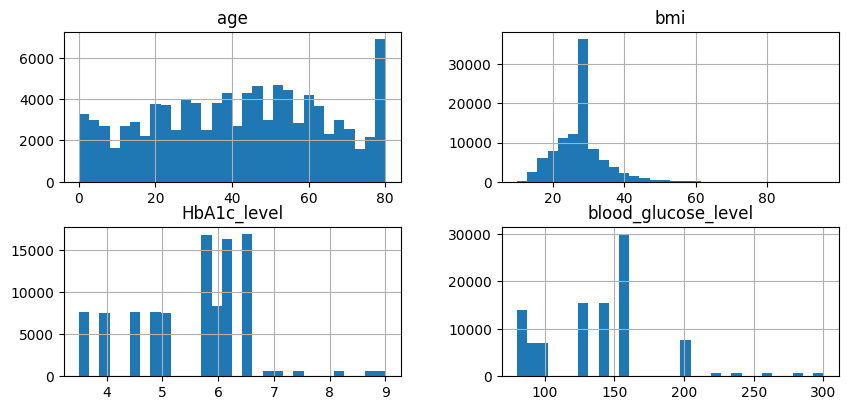

In [32]:
# ваш код здесь
df_num = df.loc[:, ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]

df_num.hist(figsize=(10, 7), layout=(3, -1), bins=30)

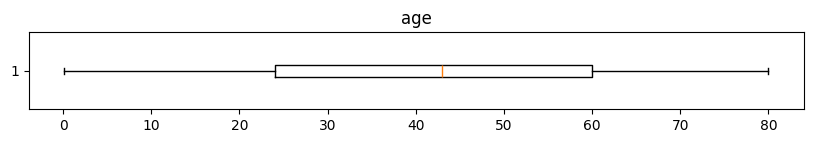

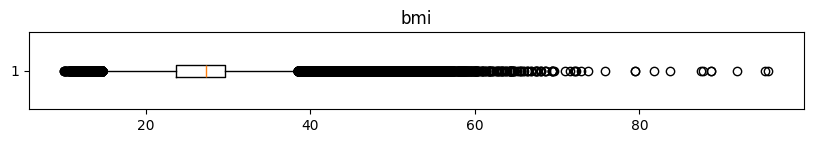

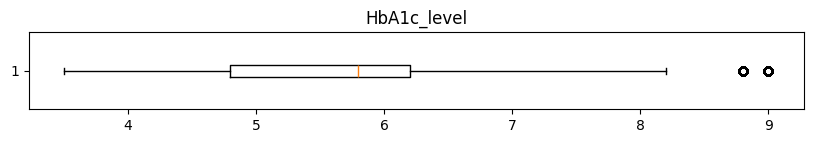

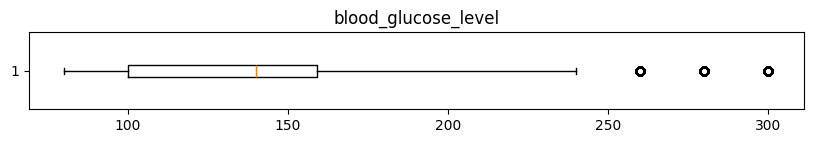

In [33]:
for col in df_num:    
    plt.figure(figsize=(10,1))
    plt.title(col)
    plt.boxplot(df[col], vert=False)
    plt.show()

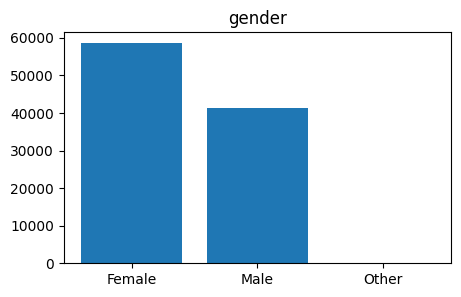

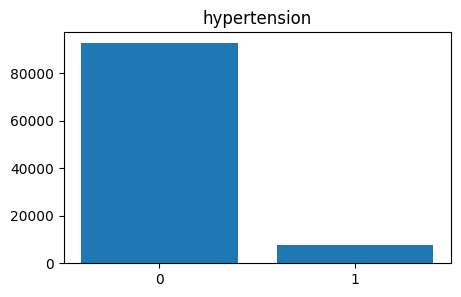

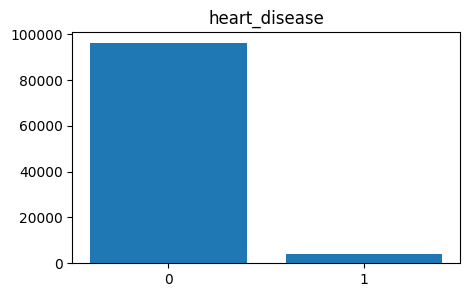

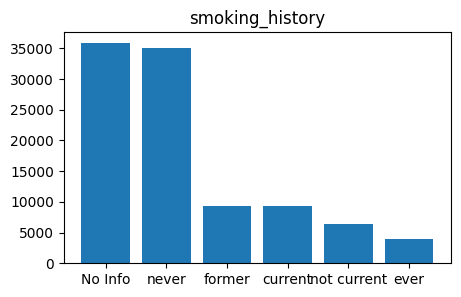

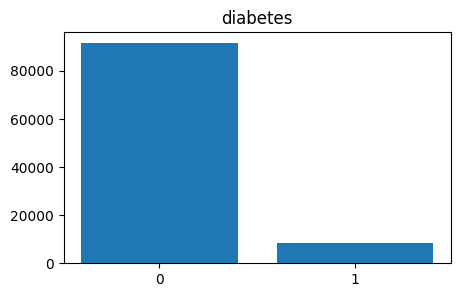

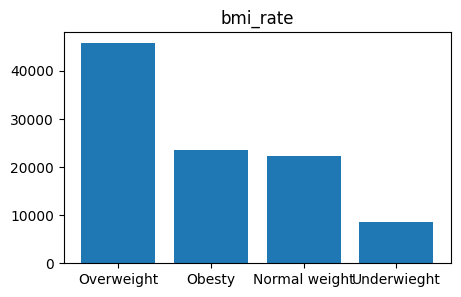

In [34]:
df_cat = df.loc[:, ['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes', 'bmi_rate']]

for cat in df_cat:
    tmp = df[cat].value_counts()
    plt.figure(figsize=(5,3))
    plt.title(cat)
    plt.bar(tmp.index, height=tmp.values)
    plt.xticks(tmp.index)
    plt.show()

**Вывод:**
- Возраст исследуемых в основном равномерно распределен, но можно видеть, что 80-летних все же больше.
- ИМТ имеет нормальное распределение. Заметна тенденция к избыточному весу.
- Показатели гемоглобина и глюкозы имеют несколько высоких показателей, что скорее всего не является выбросами, но относятся к небольшой категории больных людей, у которых также наблюдаются гипертензия, болезни сердца и диабет.

In [35]:
# Добавляю столбцы категориальных показателей, закодированных с помощью factorize():
df['gender_rate'] = pd.factorize(df['gender'])[0]
df['smoking_history_rate'] = pd.factorize(df['smoking_history'])[0]

df.sample(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_rate,gender_rate,smoking_history_rate
4854,Male,74.0,0,0,current,26.67,5.8,300,1,Overweight,1,2
58763,Female,32.0,0,0,never,49.49,6.0,160,0,Obesty,0,0
83261,Female,42.0,0,0,never,46.84,6.5,130,1,Obesty,0,0
47014,Male,22.0,0,0,No Info,26.21,5.8,130,0,Overweight,1,1
32520,Female,16.0,0,0,No Info,34.63,3.5,159,0,Obesty,0,1


<Axes: >

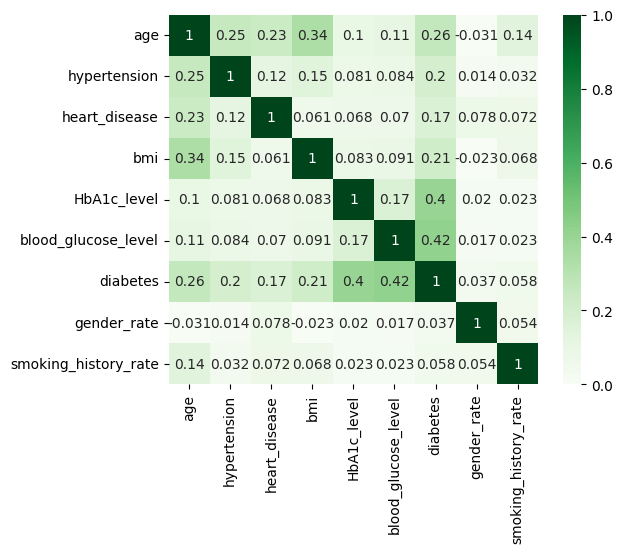

In [36]:
df_phik = df.loc[:, ['age', 'hypertension', 'heart_disease','bmi', 'HbA1c_level', 'blood_glucose_level',\
                     'diabetes', 'gender_rate', 'smoking_history_rate']]
corrs = df_phik.corr()
sns.heatmap(corrs, cmap='Greens', square=True, vmin=0, annot=True)

**Вывод:**

- Наибольшую корреляцию с таргетом показывают характеристики глюкозы (0,42) и гемоглобина (0,4). 
- Возраст (0,26) и ИМТ (0,21), а также гипертензия (0,2) и болезни сердца (0,17) способствуют развитию диабета, но не являются его непосредственными признаками.
- Что интересно: ИМТ (0,34), а с ним и риск гипертензии (0,25) и болезней сердца (0,23) увеличиваются с возрастом.

## Сравнение выборок

После построения всех типов графиков, необходимо провести анализ:

Отобразите на одном графике две выборки — люди с диабетом и без и сравните их.

1. Для числовых признаков — гистограммы и ящики с усами.
2. Для категориальных — столбчатые диаграммы.

После напишите вывод, есть ли какая-то зависимость?

In [37]:
# ваш код здесь
df_diabet = df.loc[df['diabetes'] == 1]
df_diabet.sample(7)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_rate,gender_rate,smoking_history_rate
25848,Female,80.0,0,1,never,24.27,6.0,140,1,Normal weight,0,0
27352,Female,74.0,1,0,never,31.56,6.8,200,1,Obesty,0,0
18944,Male,64.0,0,1,never,27.32,5.8,130,1,Overweight,1,0
35311,Male,61.0,0,1,never,21.24,9.0,155,1,Normal weight,1,0
99957,Female,61.0,0,0,No Info,34.45,6.5,280,1,Obesty,0,1
34778,Male,67.0,0,0,never,32.80,6.1,145,1,Obesty,1,0
22271,Female,80.0,0,0,never,27.32,7.0,300,1,Overweight,0,0


In [38]:
df_no_diabet = df.loc[df['diabetes'] == 0]
df_no_diabet.sample(7)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_rate,gender_rate,smoking_history_rate
30217,Female,67.0,0,0,never,27.32,4.5,126,0,Overweight,0,0
90867,Female,29.0,0,0,former,21.61,4.0,90,0,Normal weight,0,3
13795,Male,80.0,0,0,No Info,27.32,4.0,200,0,Overweight,1,1
38944,Female,56.0,0,0,never,35.60,6.1,155,0,Obesty,0,0
162,Male,59.0,0,1,ever,30.85,5.0,126,0,Obesty,1,4
76460,Male,37.0,0,0,never,24.39,5.0,80,0,Normal weight,1,0
12176,Female,14.0,0,0,No Info,22.60,3.5,160,0,Normal weight,0,1


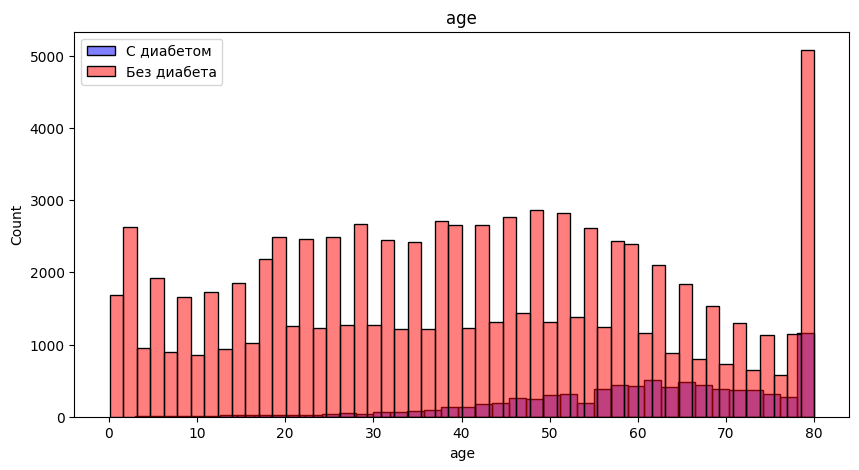

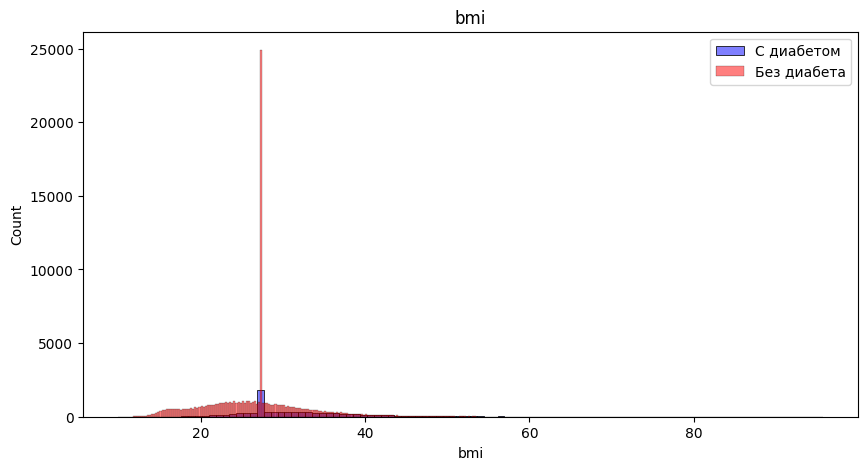

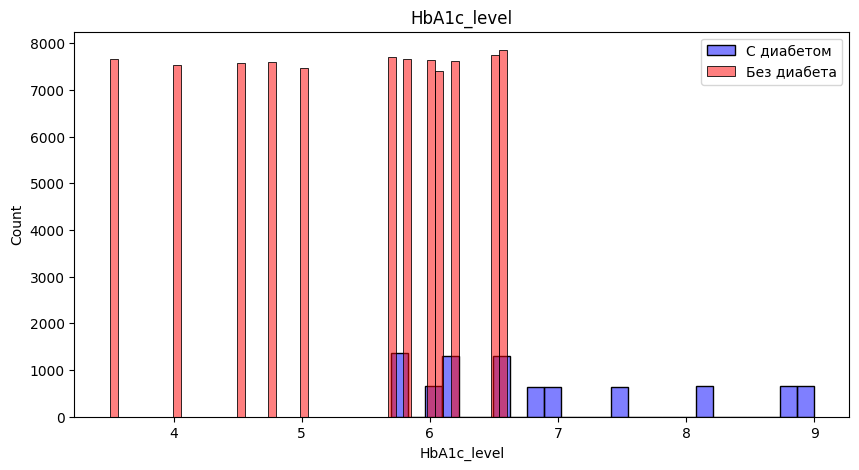

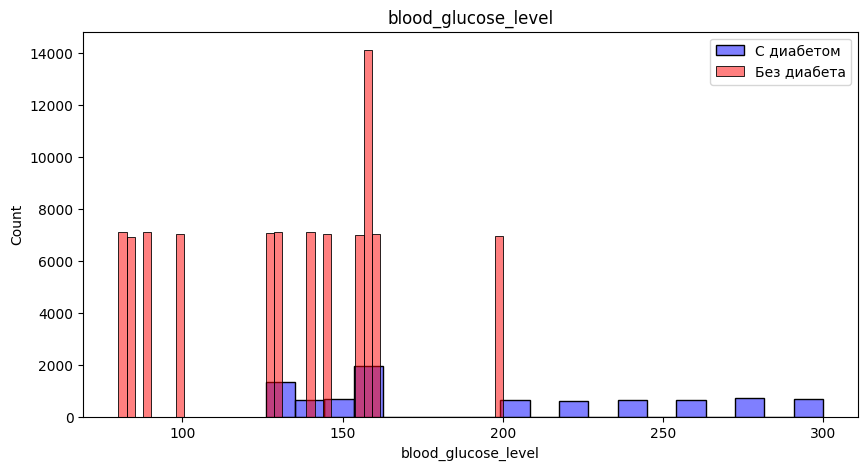

In [39]:
num_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df_diabet[col], color='blue', alpha=0.5, label='С диабетом')
    sns.histplot(df_no_diabet[col], color='red', alpha=0.5, label='Без диабета')
    plt.title(col)
    plt.legend()
    plt.show()

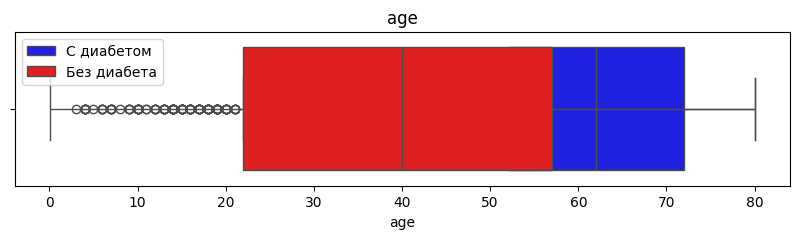

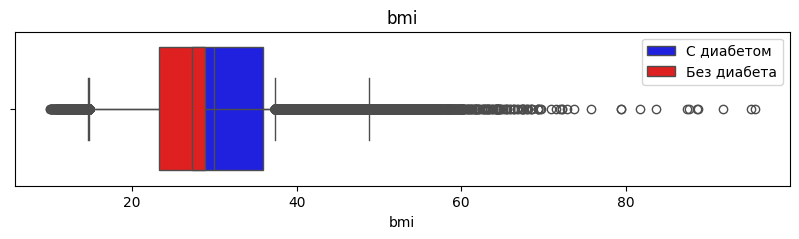

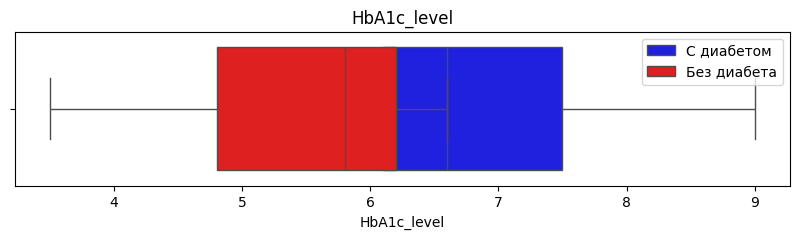

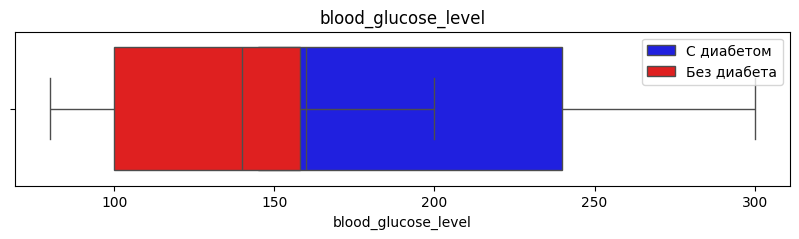

In [40]:
for col in num_cols:
    plt.figure(figsize=(10,2))
    plt.title(col)
    sns.boxplot(df_diabet[col], color='blue', label='С диабетом', orient='h')
    sns.boxplot(df_no_diabet[col], color='red', label='Без диабета', orient='h')
    plt.legend()
    plt.show()

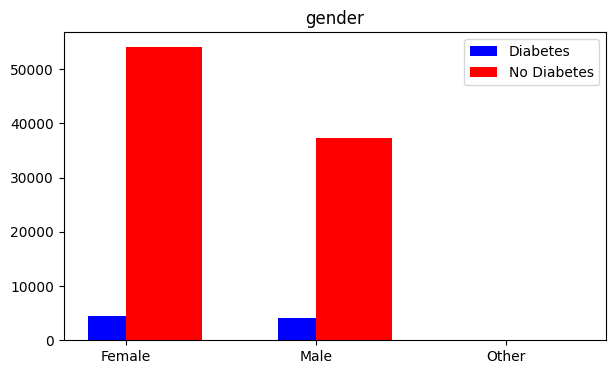

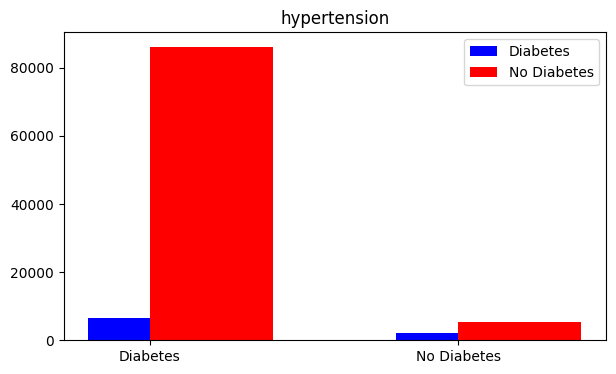

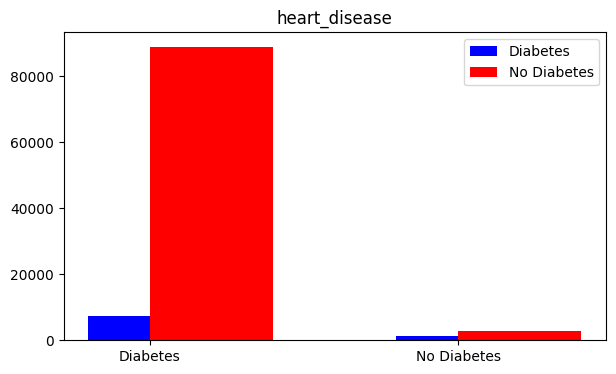

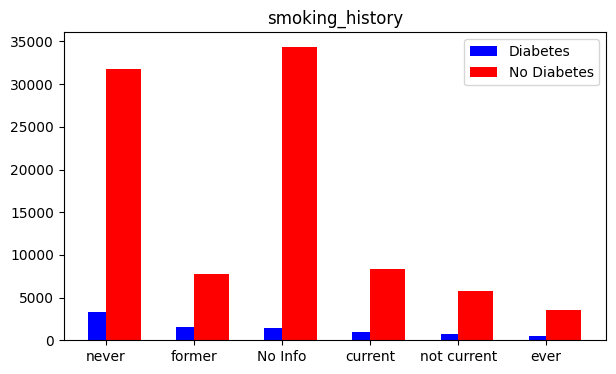

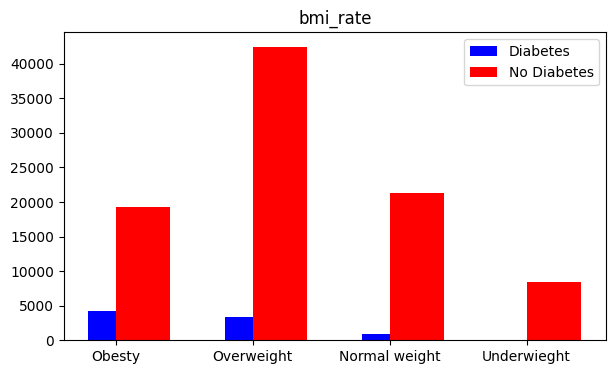

In [41]:
cat_cols = ['gender', 'hypertension', 'heart_disease', 'smoking_history', 'bmi_rate']

for col in cat_cols:
    tmp_diabet = df_diabet[col].value_counts().rename(index={0: 'Diabetes', 1: 'No Diabetes'})
    tmp_no_diabet = df_no_diabet[col].value_counts().rename(index={0: 'Diabetes', 1: 'No Diabetes'})

    plt.figure(figsize=(7, 4))
    plt.bar(tmp_diabet.index, tmp_diabet.values, color='b', width=0.4, label='Diabetes', align='center')
    plt.bar(tmp_no_diabet.index, tmp_no_diabet.values, color='r', width=0.4, label='No Diabetes', align='edge')
    plt.title(col)
    plt.legend()
    plt.show()

**Вывод:**
все выводы, сделанные по phik-корреляции, подтверждаются анализом двух выборок.

## ЗАДАЧИ PRO

Мы провели базовый анализ выше и сделали выводы.

Но даёт ли этот результат полную картину? Наша цель — узнать, каков риск возникновения диабета у пациента.

Ваша задача — воспользоваться ранее приобретенными навыками и дополнить общий вывод. 

**Этапы:**

1) Разделите выборки и постройте дополнительные графики. Может стоит разделить на несколько выборок и сравнить графики там?
2) Постройте `pairplot` с параметром `hue=='diabetes'`. Может там тоже где-то кроется истина?
2) Постройте тепловую карту корреляции `Phik` и сделайте дополнительный вывод.
3) Дополните общий вывод. 

**Примечание:** задание не ограничено только этими этапами. Можно их дополнить — может стоит сделать фильтр данных, рассмотреть данные под другим углом и провести дополнительную аналитику? Средствами и методами не ограничены.

In [42]:
# ваш код здесь

# Общий вывод

Опишите данные и результат исследования, основываясь на предыдущих шагах: